In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 

In [96]:
data = pd.read_csv("data.csv",delimiter=',')
data.head()


,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
0,137.218750,45.390655,0.034985,0.134409,3.204013,17.177857,7.494588,74.003104,0
1,93.773438,41.883062,0.371402,1.291232,1.482441,12.959050,12.242911,180.158844,0
2,73.632812,35.461218,1.153607,4.161082,2.099498,13.057474,10.013591,140.894151,0
3,93.429688,39.883166,0.602060,1.518548,2.475753,14.146578,8.770640,107.970173,0
4,131.625000,44.111896,0.108905,0.239879,33.888796,70.398342,1.689460,1.031847,0


In [97]:
#Нормализуем данные и раделим на тренировочный, валидационный и тестовый наборы в соотношении 60:20:20
for i in ['MIP', 'STDIP', 'EKIP', 'SIP', 'MC', 'STDC', 'EKC', 'SC']:
    data[i] = (data[i] - data[i].min())/(data[i].max() - data[i].min())
train= data.head(int(len(data)*0.6))
valid=data.iloc[10738:14319]
test=data.tail(int(len(data)*0.2))
#Запишем значения в файлы
train.to_csv("train.csv")
valid.to_csv("valid.csv")
test.to_csv("test.csv")


In [98]:
train.tail()


,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
10733,0.555100,0.383828,0.222911,0.021401,0.009729,0.074490,0.340543,0.101914,0
10734,0.339718,0.094383,0.443101,0.188568,0.173096,0.595560,0.125772,0.002648,1
10735,0.544310,0.241959,0.251351,0.044079,0.007163,0.052441,0.372391,0.135287,0
10736,0.345029,0.155543,0.279354,0.082234,0.005867,0.076229,0.401233,0.135307,0
10737,0.602401,0.340938,0.201554,0.024641,0.008643,0.116256,0.348604,0.089879,0


In [99]:
test.tail()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
17893,0.617247,0.342607,0.186825,0.022863,0.006065,0.033255,0.447896,0.227224,0
17894,0.614905,0.218176,0.217935,0.034609,0.005646,0.063348,0.432158,0.172169,0
17895,0.708168,0.312988,0.170346,0.021578,0.013701,0.092895,0.268799,0.054503,0
17896,0.608716,0.262494,0.191309,0.030683,0.007238,0.051356,0.379340,0.141293,0
17897,0.797959,0.321845,0.159908,0.027487,0.017653,0.141389,0.262376,0.045438,0


In [100]:
valid.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
10738,0.790557,0.213871,0.154074,0.040281,0.031047,0.285001,0.220324,0.022974,0
10739,0.105684,0.149163,0.633088,0.323492,0.241782,0.578280,0.116522,0.002281,1
10740,0.437581,0.192130,0.250226,0.049952,0.010906,0.111093,0.302118,0.064997,0
10741,0.479528,0.198621,0.240602,0.040364,0.009389,0.128604,0.336014,0.079266,0
10742,0.486345,0.229366,0.233275,0.039348,0.012105,0.086298,0.284426,0.064263,0


In [101]:
valid.tail()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
14314,0.527414,0.347802,0.233270,0.028479,0.008122,0.078636,0.323368,0.082563,0
14315,0.650286,0.395126,0.205859,0.016146,0.011767,0.125239,0.307767,0.066314,0
14316,0.851156,0.242255,0.074624,0.056619,0.175017,0.583977,0.124686,0.002593,0
14317,0.699302,0.406641,0.172674,0.017215,0.007347,0.101129,0.376795,0.108234,0
14318,0.472669,0.218782,0.251416,0.046269,0.012318,0.128323,0.296378,0.059717,0


In [102]:
X = pd.DataFrame(train.drop(['TARGET'], axis=1))

In [103]:
Y = pd.DataFrame(train['TARGET'])

In [104]:
X_test = pd.DataFrame(test.drop(['TARGET'], axis=1))

In [105]:
Y_test = pd.DataFrame(test['TARGET'])

In [106]:
#Линейная регрессия
reg = LinearRegression().fit(X, Y)

In [107]:
t=reg.predict(X_test)

In [108]:
t1=Y_test.to_numpy() #t1- массив с тестовым откликом

In [109]:
#Переведем полученные значения в 0 и 1 . Если значение >=0.5, то 1, иначе 0
for a in range (len(t)):
    if t[a]>=0.5 :
        t[a]=1
    else:
        t[a]=0

In [110]:
np.savetxt('result1', t)
#t.to_csv("res_lin_reg.csv")



In [111]:
n=0
for a in range (len(t1)):
    if t[a]==t1[a] :
        n+=1
print(n)

3542


In [112]:
r2 = reg.score(X,Y)
r2

0.7029599251430525

In [113]:
f1_score(Y_test, t, average='macro')

0.8891650910588336

In [28]:
#Из 3579 значений алгоритм распознал 3542 

In [114]:
importance = reg.coef_  #Значение коэффициентов  θ1,…,θp :
importance


array([[ 0.57536364, -0.18504353,  4.53205405, -2.55101321, -0.29561889,
         0.34127183, -0.47931375,  0.48456669]])

In [115]:
reg.intercept_ #Значение коэффициента  θ0 :

array([-1.0561647])

In [116]:
X1 = pd.DataFrame(train.drop(['TARGET'], axis=1))

In [117]:
y1 = pd.DataFrame(train['TARGET']).values.ravel()

In [118]:
#kNN-метод 
neigh = KNeighborsClassifier(n_neighbors=21, p=2)
neigh.fit(X1, y1)

KNeighborsClassifier(n_neighbors=21)

In [119]:
X_valid = pd.DataFrame(valid.drop(['TARGET'], axis=1))
Y_valid = pd.DataFrame(valid['TARGET'])

In [120]:
res_knn=neigh.predict(X_valid)

In [121]:
res_knn #массив с результатами knn для валидационного набора

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
neigh.kneighbors(X_valid)

(array([[0.04010119, 0.04849869, 0.0489458 , ..., 0.1010824 , 0.1017323 ,
         0.10402827],
        [0.04262735, 0.05177563, 0.05248928, ..., 0.10072044, 0.10099551,
         0.10292996],
        [0.01298574, 0.0233227 , 0.02453166, ..., 0.03302767, 0.03319583,
         0.03360801],
        ...,
        [0.07782336, 0.07968669, 0.1093827 , ..., 0.18537472, 0.19086995,
         0.19635154],
        [0.02713805, 0.02960404, 0.03430673, ..., 0.04925811, 0.04953093,
         0.04968546],
        [0.01184802, 0.01371991, 0.02095626, ..., 0.03653839, 0.03694725,
         0.0372334 ]]),
 array([[ 5286,  9750,  2023, ...,  9727,  2723,  5105],
        [ 4957,  7944,  4686, ...,  5463,  5809,  5344],
        [  724,  3232,  8704, ...,  7064,  4557,  6452],
        ...,
        [ 5994,  6479,  6569, ...,  3748,  6012,  3249],
        [ 5029,  7316,   483, ...,  2351, 10367,  6000],
        [ 6595,  9641, 10514, ...,  7545,  9364,  7561]], dtype=int64))

In [123]:
t2=Y_valid.to_numpy()  #t2 - массив с валидационными данными отклика
k=0
for a in range (len(res_knn)):
    if res_knn[a]==t2[a] :
        k+=1
print(k)

3517


In [124]:
res_knn_test=neigh.predict(X_test)

In [125]:
neigh.kneighbors(X_test)

(array([[0.03177011, 0.03488981, 0.03674367, ..., 0.05001876, 0.05116724,
         0.05157489],
        [0.01892694, 0.01928914, 0.02431449, ..., 0.04162287, 0.04162416,
         0.04167478],
        [0.01372589, 0.01897686, 0.02214051, ..., 0.03618474, 0.03664356,
         0.03665846],
        ...,
        [0.01882837, 0.03313636, 0.03490767, ..., 0.04428494, 0.04434473,
         0.04435525],
        [0.01563422, 0.0175438 , 0.01843601, ..., 0.0371321 , 0.03757803,
         0.03771771],
        [0.03691649, 0.04012576, 0.04728962, ..., 0.06616455, 0.06622981,
         0.06638275]]),
 array([[ 4706,  5663,  5117, ...,  2183,  2999,  8917],
        [ 8497,  7876, 10086, ...,  2600,  8389,  6230],
        [ 6980,  8138,  8900, ...,   955, 10598,  7000],
        ...,
        [ 9907,   765,   943, ...,  4148,  9251,  2457],
        [ 3663,   708,   930, ...,  6740,  4065,  8147],
        [ 5141,  5988,  3044, ...,   714,  5422,  4762]], dtype=int64))

In [126]:
#t3=Y_test.to_numpy()
q=0
for a in range (len(res_knn_test)):
    if res_knn_test[a]==t1[a] :
        q+=1
print(q)

3538


In [127]:
r2 = neigh.score(X_test,Y_test)
r2

0.9885442861134395

In [128]:
f1_score(Y_test, res_knn_test, average='macro')

0.8799214418690289

In [ ]:
#Логистическая регрессия

In [65]:
#обучение модели
reg_log = LogisticRegression(penalty='l1', random_state=2019, solver='saga').fit(X, Y.values.ravel())

In [66]:
res_log_valid=reg_log.predict(X_valid)

In [67]:
res_log_valid

b=0
for a in range (len(res_log_valid)):
    if res_log_valid[a]==t2[a] :
        b+=1
print(b)
r2 = reg_log.score(X_valid,Y_valid)
r2

3519


0.9826864004468026

In [68]:
res_log_test=reg_log.predict(X_test)

In [69]:
t3=Y_test.to_numpy()

b=0
for a in range (len(res_log_test)):
    if res_log_test[a]==t3[a] :
        b+=1
print(b)
r2 = reg_log.score(X_test,Y_test)
r2

3539


0.9888236937692093

In [70]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test['TARGET'].to_frame().T).values.ravel()

In [71]:
Y_pred_probs = reg_log.predict_proba(X_test)

In [72]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [73]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

In [74]:
fpr, tpr, _ = metrics.roc_curve(Y_true, res_log_test)

In [75]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.9690059974314534

In [76]:
#вычисление Recall
metrics.recall_score(Y_true, res_log_test)

0.7608695652173914

In [77]:
#вычисление Precision
metrics.precision_score(Y_true, res_log_test)

0.7954545454545454

In [93]:
f1_score(Y_test, res_log_test, average='macro')

0.8860227381293589

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


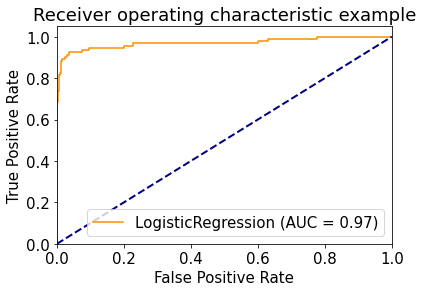

In [80]:
metrics.plot_roc_curve(reg_log, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [83]:
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [86]:
report = classification_report(Y_test, reg_log.predict(X_test), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.99      0.99      0.99      3487
     Churned       0.80      0.76      0.78        92

    accuracy                           0.99      3579
   macro avg       0.89      0.88      0.89      3579
weighted avg       0.99      0.99      0.99      3579



Confusion matrix, without normalization
[[3469   18]
 [  22   70]]


NameError: name 'itertools' is not defined

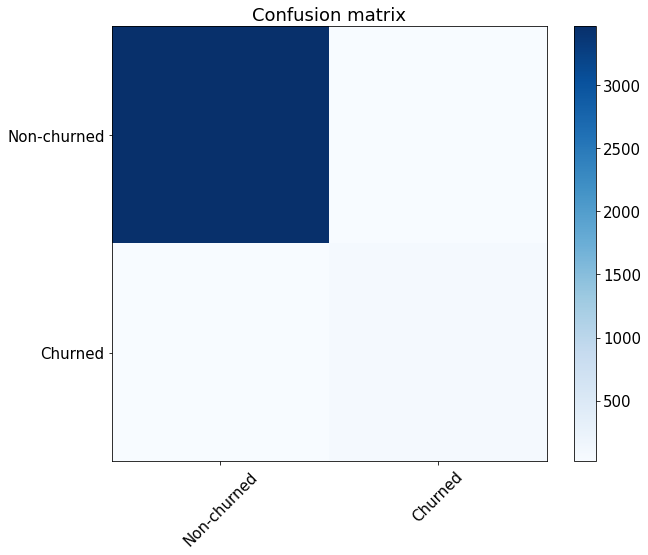

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, reg_log.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
features = list(train.columns[:8])
x = train[features]
y = train['TARGET']

In [168]:
#Дерево решений
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

In [169]:
features = list(valid.columns[:8])
x1 = valid[features]
y_true = valid['TARGET']
y_pred = clf.predict(x1)

In [170]:
features = list(test.columns[:8])
x2 = test[features]
y_true = test['TARGET']
y_pred = clf.predict(x2)

In [171]:
k=0
for a in range (len(y_pred)):
    if y_pred[a]==t3[a] :
        k+=1
print(k)

3535


In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9877060631461302

In [175]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred) #average='macro')

0.7528089887640451

In [176]:
f1_score(y_true, y_pred, average='macro')

0.8732526319178391

In [177]:
clf.tree_.max_depth

8

In [166]:
r2 = clf.score(X_valid,Y_valid)
r2

0.9815693940240157

In [64]:
report = classification_report(y_true, clf.predict(x1), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.99      0.99      0.99      3351
     Churned       0.89      0.84      0.86       230

    accuracy                           0.98      3581
   macro avg       0.94      0.92      0.93      3581
weighted avg       0.98      0.98      0.98      3581



In [87]:
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

Confusion matrix, without normalization
[[3463   24]
 [  24   68]]


NameError: name 'itertools' is not defined

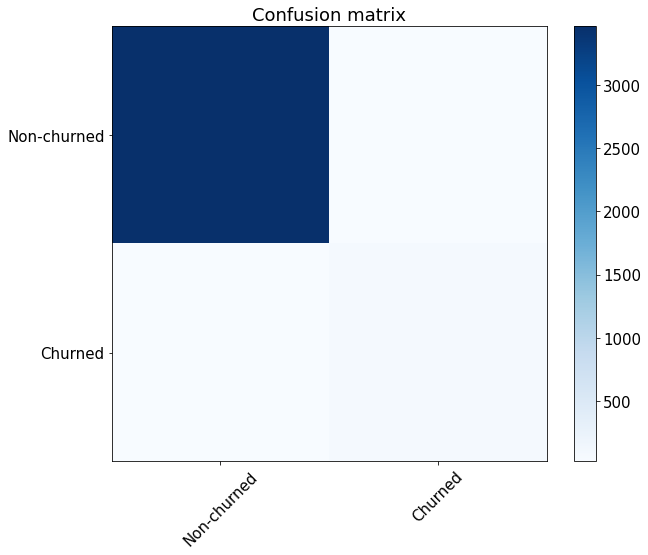

In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, clf.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [284]:
from sklearn.neural_network import MLPClassifier

In [291]:
MLP = MLPClassifier(solver='lbfgs', hidden_layer_sizes = (8,2),max_iter=10000, alpha = 1e-5, random_state = 1)
MLP.fit(X, Y)


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

In [286]:
Y_mlpv=MLP.predict(X_valid)

In [287]:
Y_mlpv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [288]:
b=0
for a in range (len(Y_mlpv)):
    if Y_mlpv[a]==t2[a] :
        b+=1
print(b)

3351


In [289]:
r2 = MLP.score(X_valid,Y_valid)
r2

0.9357721306897515

In [290]:
f1_score(Y_valid, Y_mlpv, average='macro')

0.48341027120600116

In [270]:
accuracy_score(Y_valid, Y_mlpv)

0.9357721306897515

In [295]:
Y_mlp_test=MLP.predict(X_test)

In [296]:
b=0
for a in range (len(Y_mlp_test)):
    if Y_mlp_test[a]==t3[a] :
        b+=1
print(b)

3540


In [298]:
accuracy_score(Y_test, Y_mlp_test)

0.989103101424979

In [299]:
f1_score(Y_test, Y_mlp_test, average='macro')

0.8929246220207936